## Processing k6 results

In [1]:
import json
SETUP_PATH = '../common/setup.json'
f = open(SETUP_PATH)
data = json.load(f)

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../common')
import utils

dir = utils.get_last_result_dir(setup_data=data)
print(dir)

for key in data["apps"]:
    fw = data["apps"][key]
    path = f'./{dir}/{fw["name"]}.csv'
    print(path)
    data["apps"][key]['df'] = pd.read_csv(path)

out/out_2024-06-01_15-54-34
./out/out_2024-06-01_15-54-34/.NET.csv
./out/out_2024-06-01_15-54-34/Django.csv
./out/out_2024-06-01_15-54-34/NestJS.csv


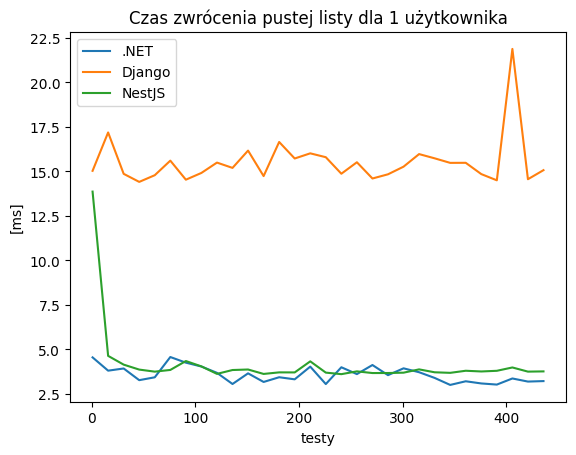

In [4]:
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    duration = df_1['metric_value']
    title = f'Czas zwrócenia pustej listy dla {data["vus"]} {"użytkowników" if data["vus"] > 1 else "użytkownika"}'
    sns.lineplot(data=duration, label=f'{fw["name"]}').set(title=title, xlabel="testy", ylabel="[ms]")
    plt.savefig('Request_duration_for_1_user.png')

In [5]:
df_2 = pd.DataFrame()
for key in data["apps"]:
    fw = data["apps"][key]
    df = fw['df']
    df_1 = df.loc[(df['metric_name'] == 'http_req_duration')][:]
    df_1 = df_1.filter(['timestamp', 'metric_value'])
    df_2[key + '_duration'] = df_1['metric_value']
df_2.describe()

,dotnet_duration,django_duration,nestjs_duration
count,30.000000,30.000000,30.000000
mean,3.583862,15.519938,4.175505
std,0.451300,1.370815,1.844684
min,2.998168,14.405789,3.603128
25%,3.205611,14.835335,3.692254
50%,3.488682,15.226789,3.759289
75%,3.928522,15.727584,3.869640
max,4.565789,21.877117,13.860704


In [6]:
df_2.columns

Index(['dotnet_duration', 'django_duration', 'nestjs_duration'], dtype='object')

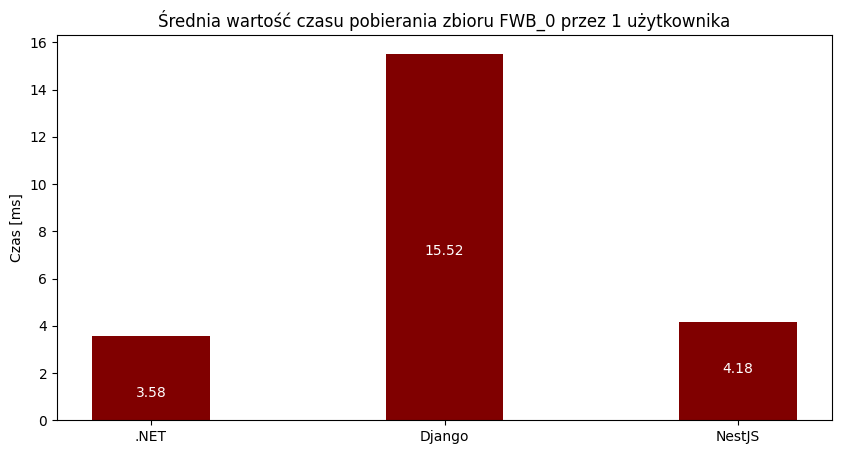

In [7]:
# creating the dataset
frameworks = list(map(lambda x: x['name'], data["apps"].values()))
mean_duration = [df_2[column_name].mean() for column_name in df_2.columns]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(frameworks, mean_duration, color ='maroon', 
        width = 0.4)

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, round(y[i], 2), ha = 'center', c="white")

addlabels(frameworks, mean_duration)
 
# plt.xlabel("Courses offered")
plt.ylabel("Czas [ms]")
plt.title("Średnia wartość czasu pobierania zbioru FWB_0 przez 1 użytkownika")
# plt.show()
plt.savefig('Mean_duration_for_1_user.png')

Text(0.5, 1.0, 'Quantity of records for .NET with 1 user')

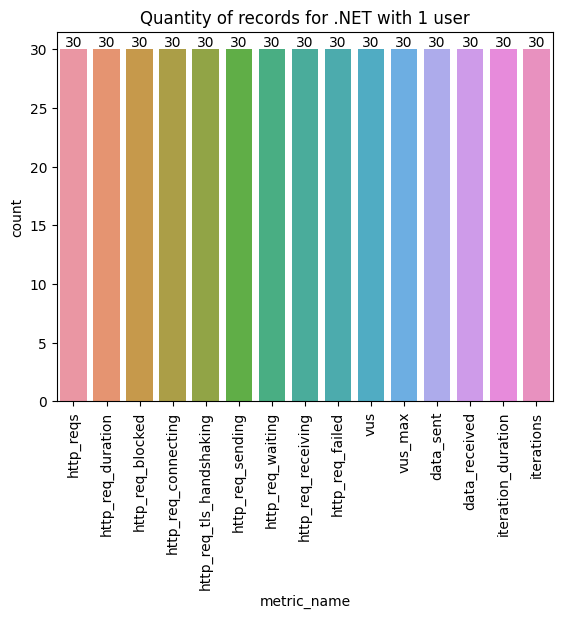

In [8]:
index = 0
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']

chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')


Text(0.5, 1.0, 'Quantity of records for Django with 1 user')

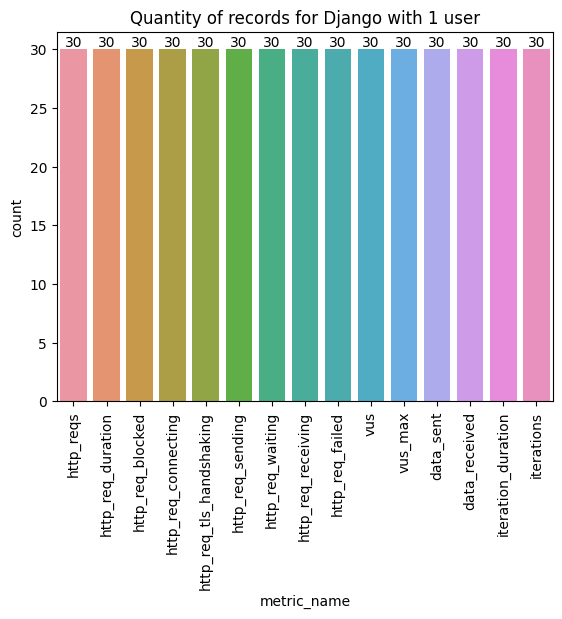

In [9]:
index = 1
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')

Text(0.5, 1.0, 'Quantity of records for NestJS with 1 user')

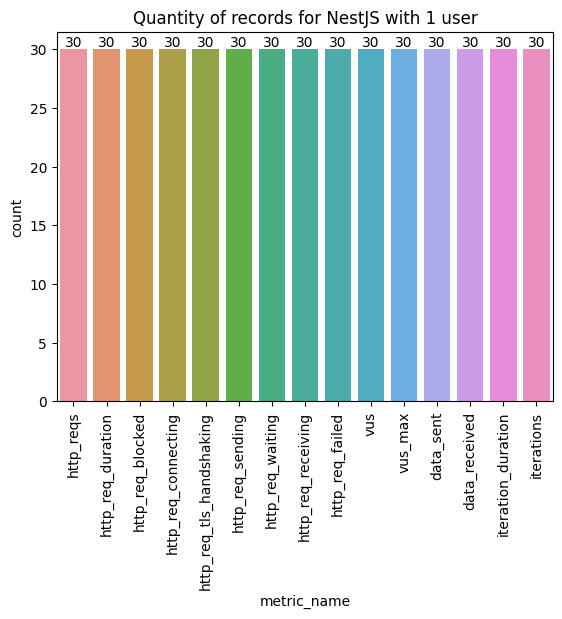

In [10]:
index = 2
fw = data["apps"][list(data["apps"].keys())[index]]
df = fw['df']
chart = sns.countplot(data=df, x='metric_name')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.bar_label(chart.containers[0])
chart.set_title(f'Quantity of records for {fw["name"]} with {data["vus"]} {"users" if data["vus"] > 1 else "user"}')